In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [2]:
combined_df=pd.read_hdf('combined_df_test.h5', key='df')

In [3]:
print('PSD=0的占比：',combined_df[combined_df['PSD']==0].shape[0]/combined_df.shape[0])
combined_df_5 = combined_df[combined_df['Interpolated_Lstar'] >= 3]
combined_df_5 = combined_df_5[combined_df['Interpolated_Lstar'] <=6]


combined_df_5_Dst_30 = combined_df_5[combined_df_5['Dst_0h'] <= -50]
combined_df_5_Dst_0 = combined_df_5[combined_df_5['Dst_0h'] >= -10]

print(combined_df_5_Dst_30['Flux'].mean()/combined_df_5_Dst_0['Flux'].mean())

PSD=0的占比： 0.46594178490153715


C:\Users\root\AppData\Local\Temp\ipykernel_85312\1261958017.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df_5 = combined_df_5[combined_df['Interpolated_Lstar'] <=6]


1.707140085580276


In [4]:
print(combined_df.columns)

Index(['Time', 'Flux', 'Flux_Error', 'PitchAngle', 'B_Calc', 'B_Eq', 'I', 'L',
       'L_star', 'MLT',
       ...
       'Kp_150h', 'Dst_150h', 'F107_150h', 'AE_150h', 'AL_150h', 'AU_150h',
       'BZGSM_IS1_150h', 'TEMP_IS1_150h', 'PDYN_IS1_150h', 'F107_IS1_150h'],
      dtype='object', length=2432)


In [5]:
print(combined_df['Kp_1h'])

0           0
1           0
2           0
3           0
4           0
           ..
1217205    10
1217206    10
1217207    10
1217208    10
1217209    10
Name: Kp_1h, Length: 1217210, dtype: int64


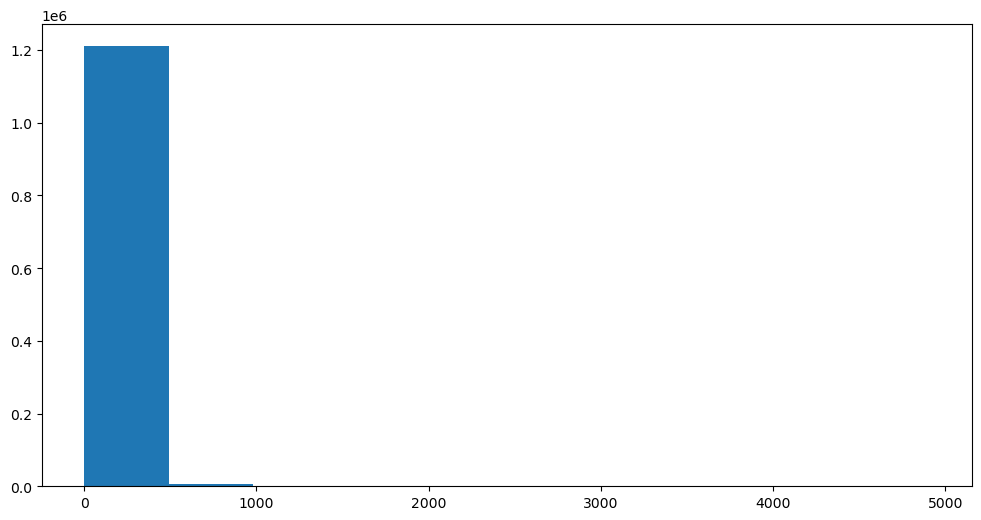

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Flux'])

plt.show()

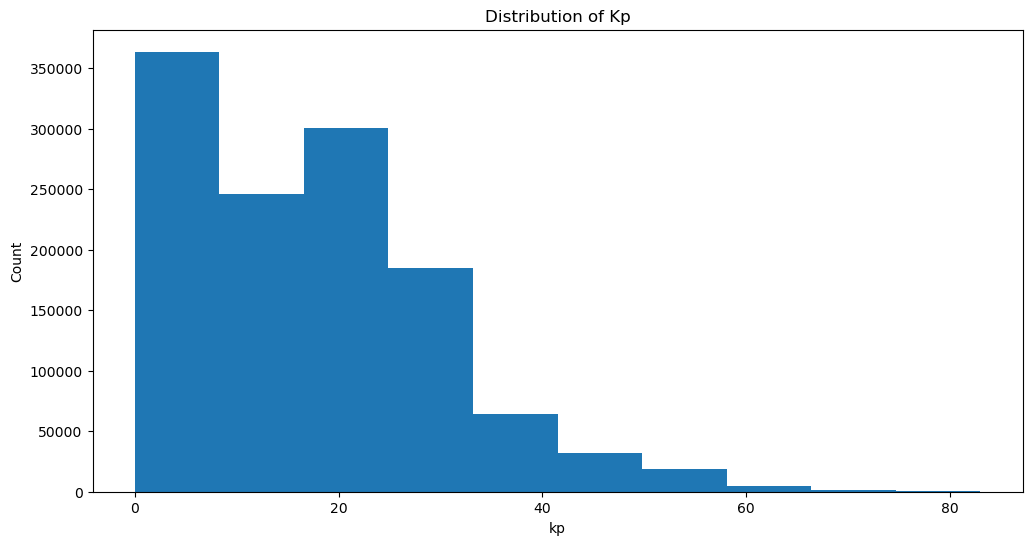

In [7]:
#画出df_with_kp['kp']分布
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Kp_2h'])
plt.xlabel('kp')
plt.ylabel('Count')
plt.title('Distribution of Kp')
plt.show()

In [8]:
#检查是否有缺失值
print(combined_df.isnull().sum().tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
print(combined_df.shape)

(1217210, 2432)


In [10]:



# combined_df = combined_df.dropna()
# print(combined_df.isnull().sum().tolist())


In [11]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
print(combined_df)

                           Time          Flux  Flux_Error  PitchAngle  \
0       2012-10-05 00:02:15.891  0.000000e+00  239.086792  155.454545   
1       2012-10-05 00:03:22.160  3.261688e+00   72.069451  106.363636   
2       2012-10-05 00:03:43.449  0.000000e+00  245.999985    8.181818   
3       2012-10-05 00:04:38.170  1.253043e-07  165.464490   40.909091   
4       2012-10-05 00:05:00.649  0.000000e+00  127.314568   90.000000   
...                         ...           ...         ...         ...   
1217205 2018-12-31 23:40:33.457  9.130861e-01   60.450386   90.000000   
1217206 2018-12-31 23:45:42.045  0.000000e+00  136.610764    8.181818   
1217207 2018-12-31 23:52:58.329  6.723220e-01   83.023926  106.363636   
1217208 2018-12-31 23:53:49.009  0.000000e+00  106.420166  139.090909   
1217209 2018-12-31 23:55:37.148  0.000000e+00  118.015068  171.818182   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         462.260007   431.858483  0.167121  

In [13]:
print(combined_df)

                           Time          Flux  Flux_Error  PitchAngle  \
0       2012-10-05 00:02:15.891  0.000000e+00  239.086792  155.454545   
1       2012-10-05 00:03:22.160  3.261688e+00   72.069451  106.363636   
2       2012-10-05 00:03:43.449  0.000000e+00  245.999985    8.181818   
3       2012-10-05 00:04:38.170  1.253043e-07  165.464490   40.909091   
4       2012-10-05 00:05:00.649  0.000000e+00  127.314568   90.000000   
...                         ...           ...         ...         ...   
1217205 2018-12-31 23:40:33.457  9.130861e-01   60.450386   90.000000   
1217206 2018-12-31 23:45:42.045  0.000000e+00  136.610764    8.181818   
1217207 2018-12-31 23:52:58.329  6.723220e-01   83.023926  106.363636   
1217208 2018-12-31 23:53:49.009  0.000000e+00  106.420166  139.090909   
1217209 2018-12-31 23:55:37.148  0.000000e+00  118.015068  171.818182   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         462.260007   431.858483  0.167121  

In [14]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'Flux_Error', 'PitchAngle', 'B_Calc', 'B_Eq', 'I', 'L', 'L_star', 'MLT', 'X', 'Y', 'Z', 'Interpolated_Lstar', 'u', 'PSD', 'VX_0h', 'SYMH_0h', 'VX_IS1_0h', 'BZGSM_0h', 'TEMP_0h', 'PDYN_0h', 'Kp_0h', 'Dst_0h', 'F107_0h', 'AE_0h', 'AL_0h', 'AU_0h', 'BZGSM_IS1_0h', 'TEMP_IS1_0h', 'PDYN_IS1_0h', 'F107_IS1_0h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h

In [15]:
time_steps=150
VX_time1 = [f'VX_{i}h' for i in range(0, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(0, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(0, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(0, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(0, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(0, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(0, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(0, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(0, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(0, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(0, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(0, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(0, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(0, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(0, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(0, time_steps + 1)]


In [16]:
print(VX_time1)

['VX_0h', 'VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h'

In [17]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = ['I', 'MLT','Interpolated_Lstar', 'u']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y = np.log10(combined_df['PSD'].values+1e-9 ) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(1217210, 151, 16)


In [18]:
del combined_df

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [20]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 151  # 根据您的数据调整
num_features = 16  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [21]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)

import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')
# 归一化 Flux_Error
scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.2
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [22]:
print(X_non_time[:,2].min(), X_non_time[:,2].max())
original_value = 2.6

# 使用 scaler_non_time 转换原始值为标准化后的值
scaled_value = scaler_non_time.transform([[0, 0, original_value, 0]])

L_YZ=scaled_value[0,2]
print(L_YZ)

-2.423387579078344 1.8148124774893999
-1.2654419076808618


In [23]:
X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.1, random_state=42
)

In [24]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(256, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 256)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 151, 16)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 256)          279552      ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 4)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 260)          0           ['lstm[0][0]',   

In [25]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=100,  # 设置较大的 epoch，早停会提前终止
    batch_size=256,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/100
4280/4280 [==============================] - 105s 24ms/step - loss: 0.0157 - mae: 0.0891 - val_loss: 0.0096 - val_mae: 0.0672
Epoch 2/100
4280/4280 [==============================] - 100s 23ms/step - loss: 0.0071 - mae: 0.0563 - val_loss: 0.0055 - val_mae: 0.0497
Epoch 3/100
4280/4280 [==============================] - 108s 25ms/step - loss: 0.0050 - mae: 0.0465 - val_loss: 0.0046 - val_mae: 0.0444
Epoch 4/100
4280/4280 [==============================] - 121s 28ms/step - loss: 0.0043 - mae: 0.0425 - val_loss: 0.0041 - val_mae: 0.0406
Epoch 5/100
4280/4280 [==============================] - 81s 19ms/step - loss: 0.0040 - mae: 0.0404 - val_loss: 0.0039 - val_mae: 0.0394
Epoch 6/100
4280/4280 [==============================] - 161s 38ms/step - loss: 0.0037 - mae: 0.0387 - val_loss: 0.0037 - val_mae: 0.0383
Epoch 7/100
4280/4280 [==============================] - 779s 182ms/step - loss: 0.0036 - mae: 0.0378 - val_loss: 0.0035 - val_mae: 0.0374
Epoch 8/100
4280/4280 [===========

In [26]:
y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_val_original = scaler_target.inverse_transform(y_val)

3804/3804 [==============================] - 10s 3ms/step


测试集上的 RMSE: 0.2273352715096863 测试集上的 R2: 0.9389468383698975


d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  fig.canvas

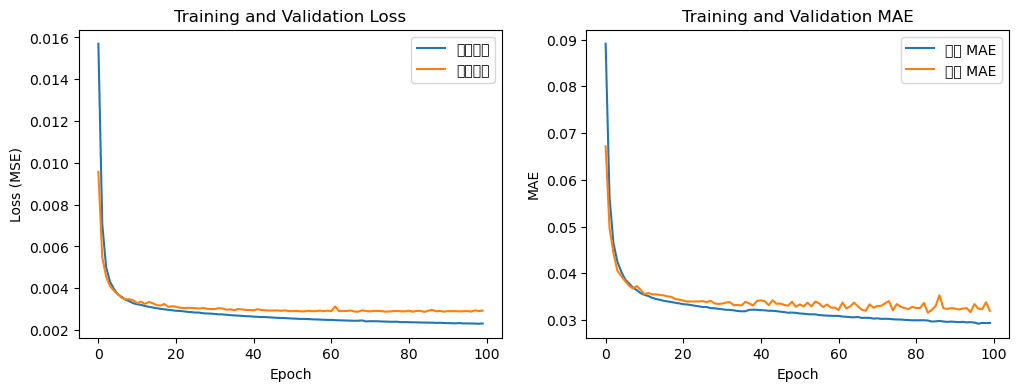

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
r2 = r2_score(y_val_original, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')


# 15. 可视化训练过程
import matplotlib.pyplot as plt

# 绘制训练和验证的损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')

# 绘制训练和验证的 MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='训练 MAE')
plt.plot(history.history['val_mae'], label='验证 MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')

plt.show()

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [29]:
#保存模型

model.save('HIGH_4_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


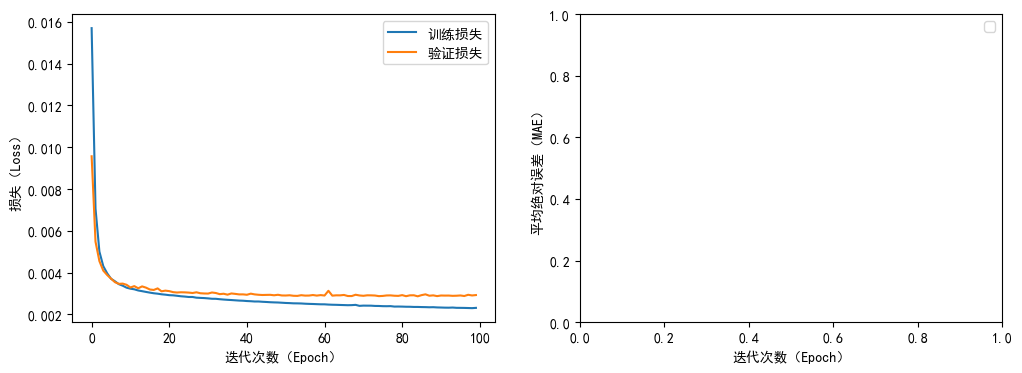

In [30]:
import matplotlib.pyplot as plt
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制训练和验证损失曲线
plt.figure(figsize=(12, 4))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('迭代次数（Epoch）')
plt.ylabel('损失（Loss）')
plt.legend()

# MAE 曲线
plt.subplot(1, 2, 2)
# plt.plot(history.history['mse'], label='训练 MAE')
# plt.plot(history.history['val_mse'], label='验证 MAE')
plt.xlabel('迭代次数（Epoch）')
plt.ylabel('平均绝对误差（MAE）')
plt.legend()

plt.show()


3225/3225 [==============================] - 9s 3ms/step
测试集上的 RMSE: 0.24109397428943152 测试集上的 R2: 0.9333961834889016


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


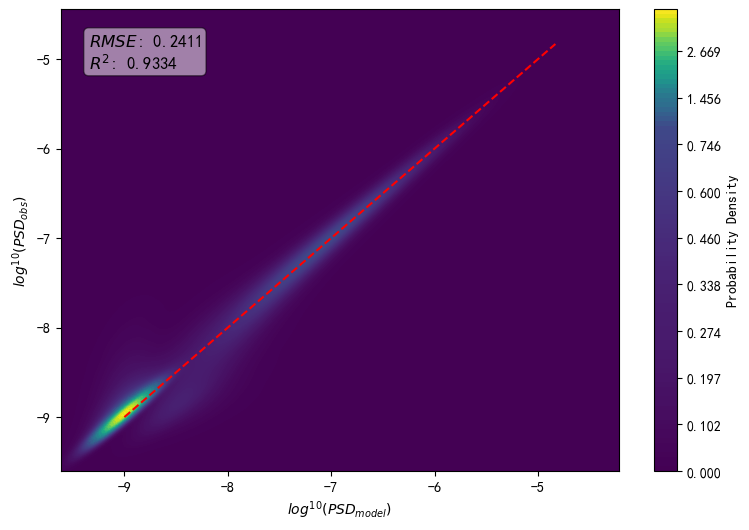

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False
mask = X_non_time_val[:,2] < L_YZ
X_non_time_val = X_non_time_val[~mask]
X_time_val = X_time_val[~mask]
y_val = y_val[~mask]

y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val)
# 生成布尔掩码
# mask_pred = y_pred >= -8
# mask_test = y_test_subset >= -8

# # 组合掩码，确保两者都满足条件
# combined_mask = mask_pred & mask_test

# # 使用组合掩码过滤 y_pred 和 y_test_subset
# y_pred_filtered = y_pred[combined_mask]
# y_test_filtered = y_test_subset[combined_mask]

# # 将对数值还原（如果需要）
# y_test_exp = y_test_filtered
# y_pred_exp = y_pred_filtered

y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')

# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100,
    bw_adjust=1.5
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections


if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density')

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-10, -6)
# plt.ylim(-10, -6)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$')
plt.ylabel('$log^{10}(PSD_{obs})$')
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()
